# Data Preprocessing

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
file_path = "Travel.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Preview the dataset
print(data.head())

print(data.info())

print(data.shape)

print(data.Gender.unique())

data.replace('Fe Male','Female',inplace=True)
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical data with median and categorical with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Ensure data types are consistent
data['ProdTaken'] = data['ProdTaken'].astype('category')
data['Passport'] = data['Passport'].astype('category')
data['OwnCar'] = data['OwnCar'].astype('category')


   CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe          

# Exploratory Data Analysis (EDA)

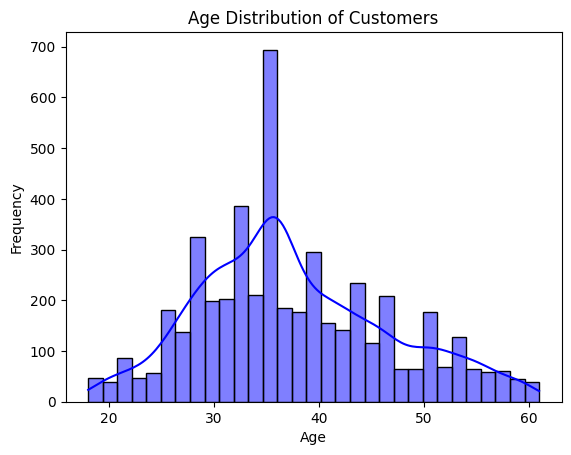

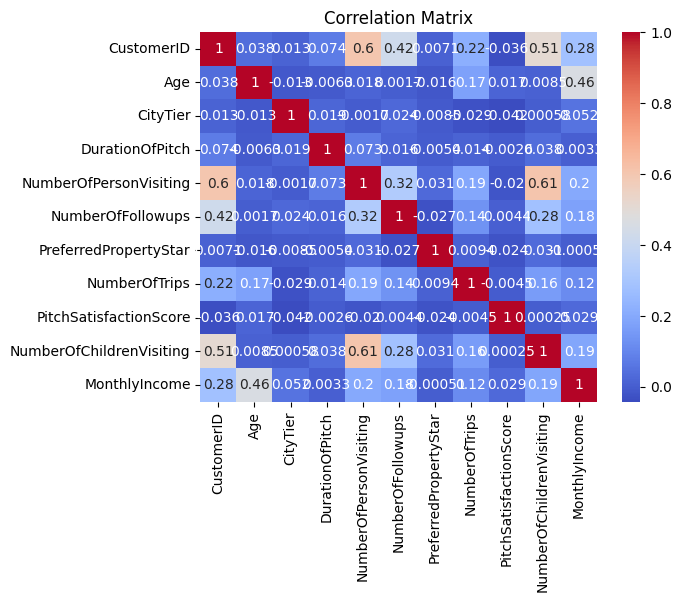

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
numeric_cols = data.select_dtypes(include=np.number).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [26]:
cats=[col for col in data.columns if data[col].dtype =='object']
nums=[col for col in data.columns if data[col].dtype !='object']

In [27]:
cats

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [28]:
nums

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

# Univariate Analysis

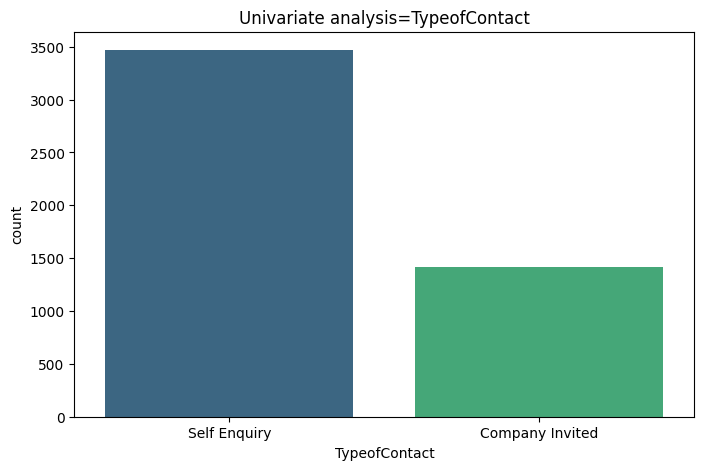

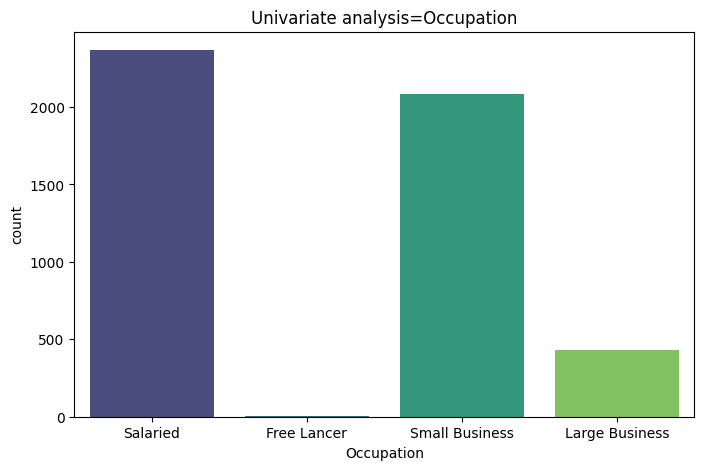

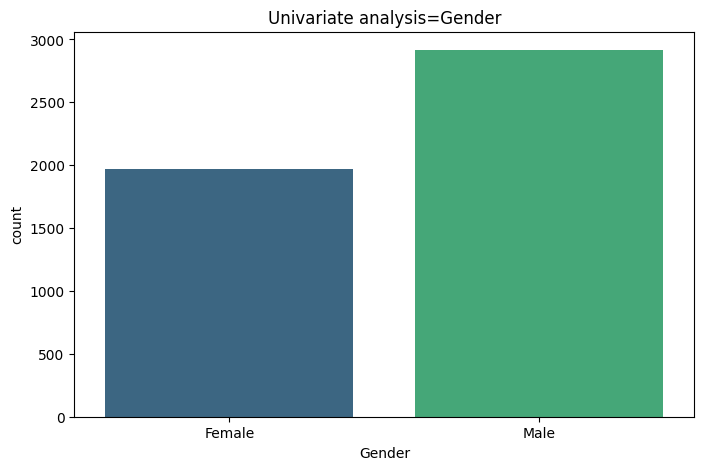

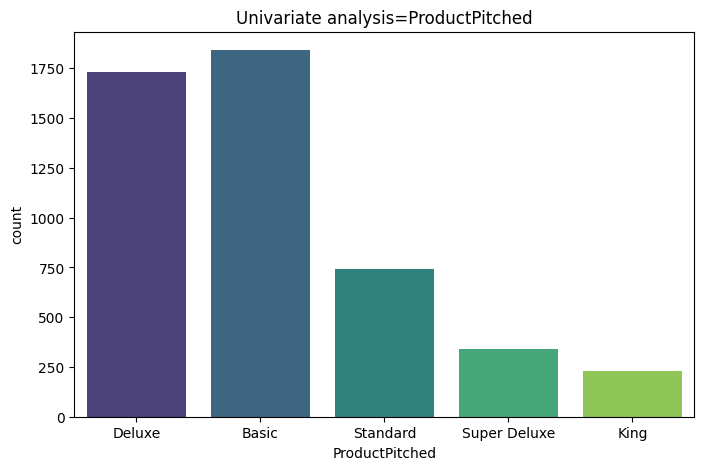

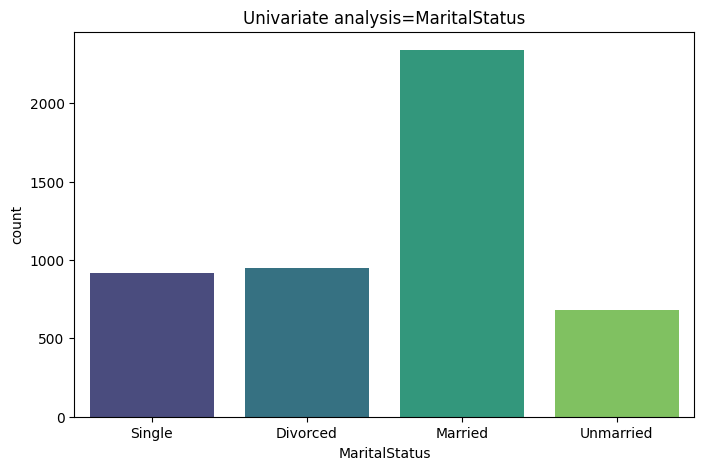

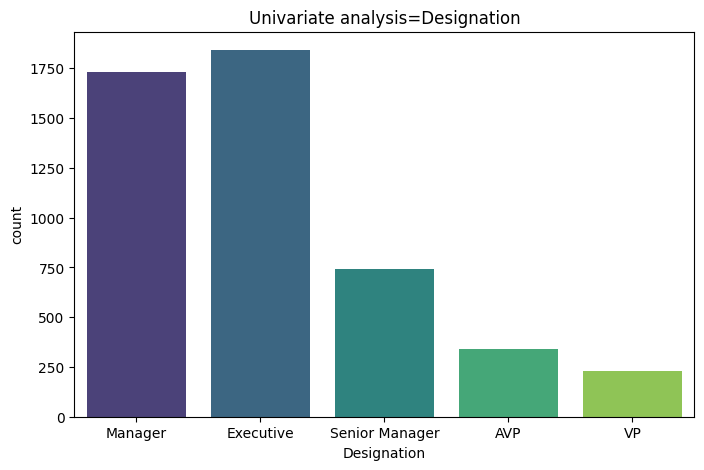

In [29]:
for cat_column in cats:
    plt.figure(figsize=(8,5))
    sns.countplot(x=cat_column,data=data,palette='viridis')
    plt.title(f'Univariate analysis={cat_column}')
    plt.show()

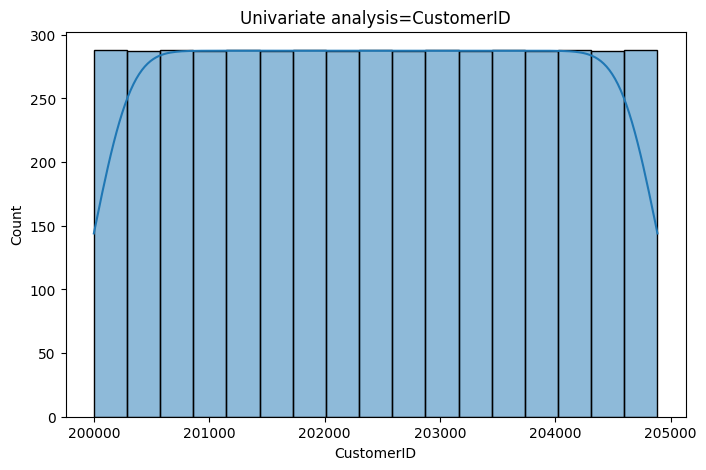

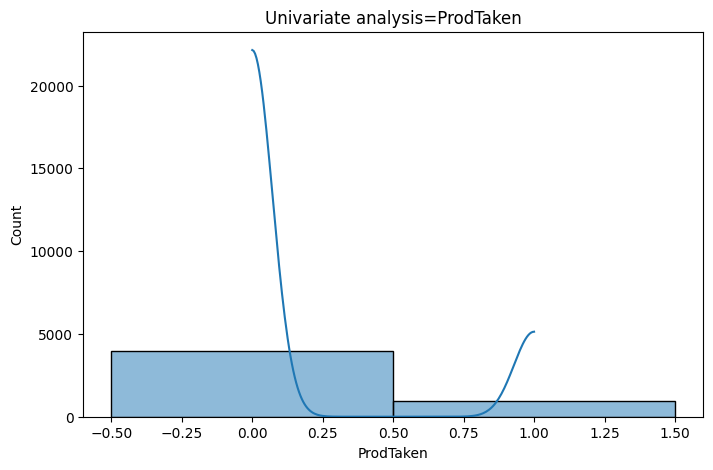

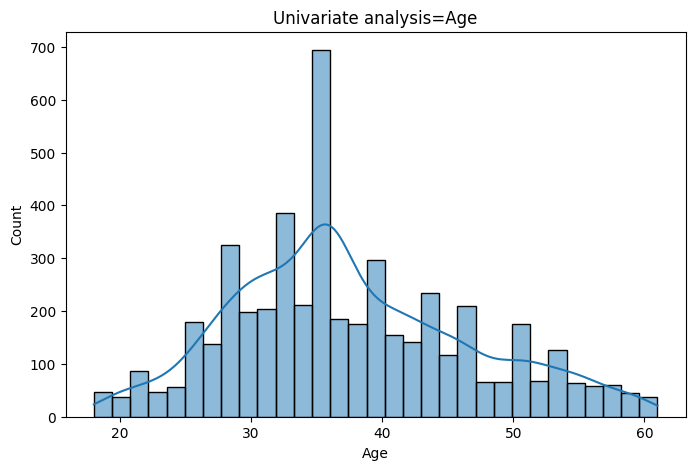

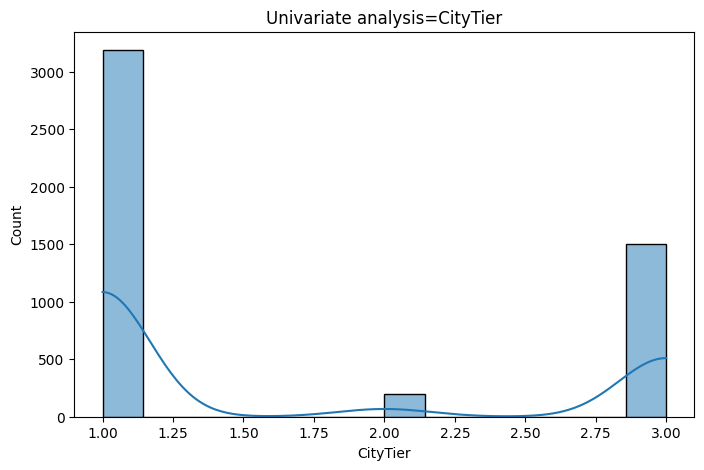

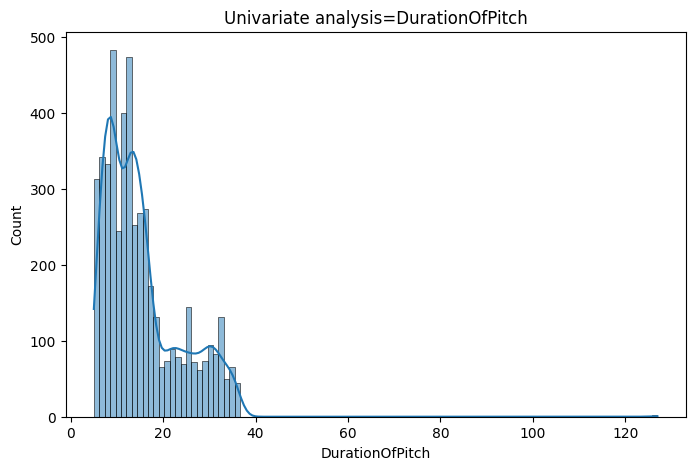

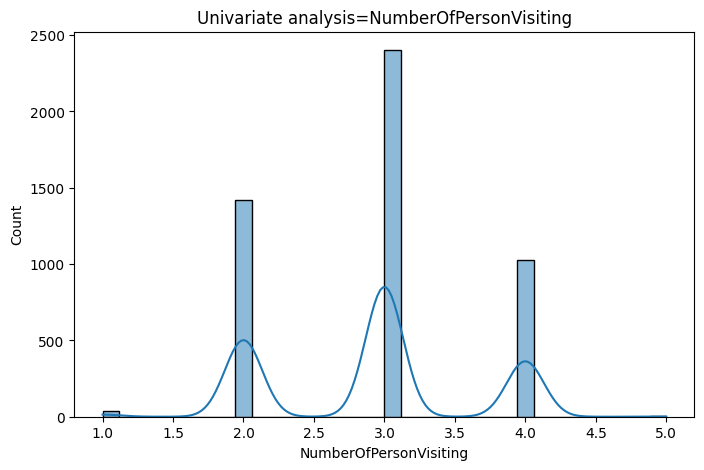

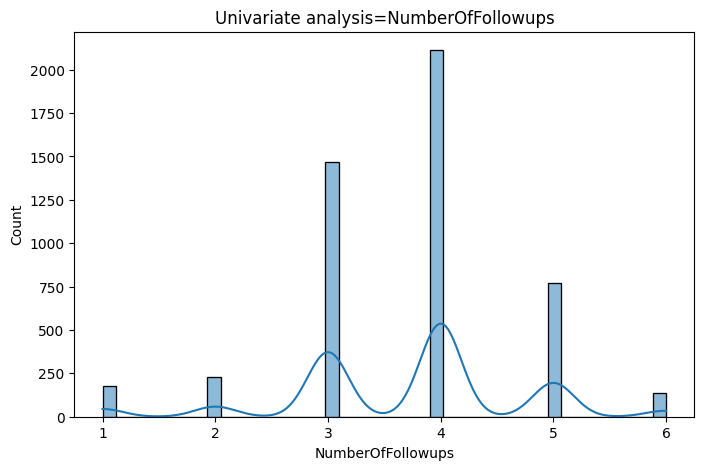

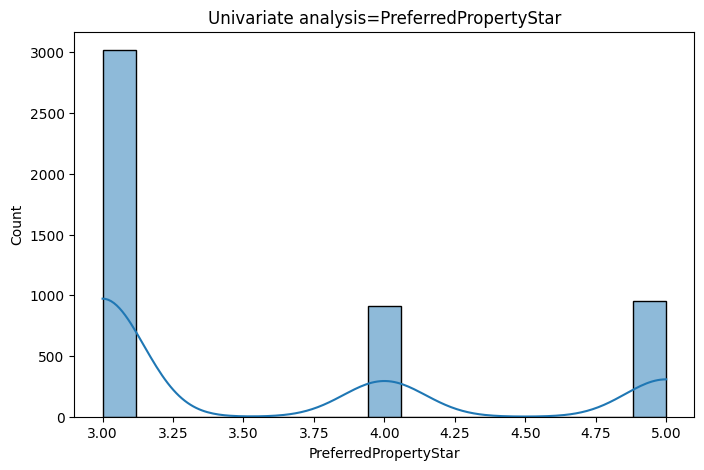

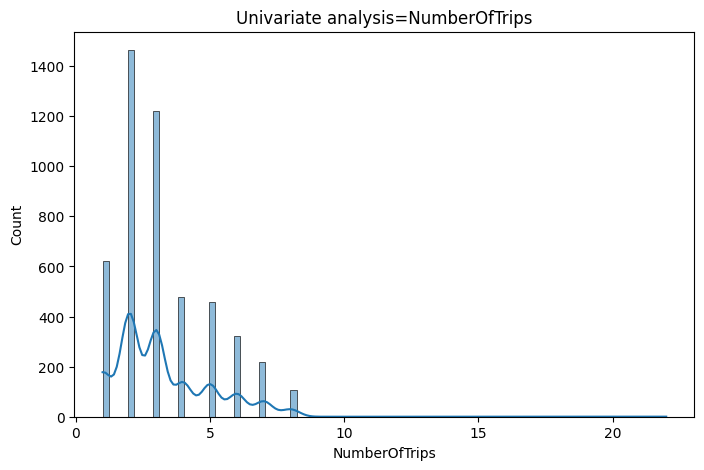

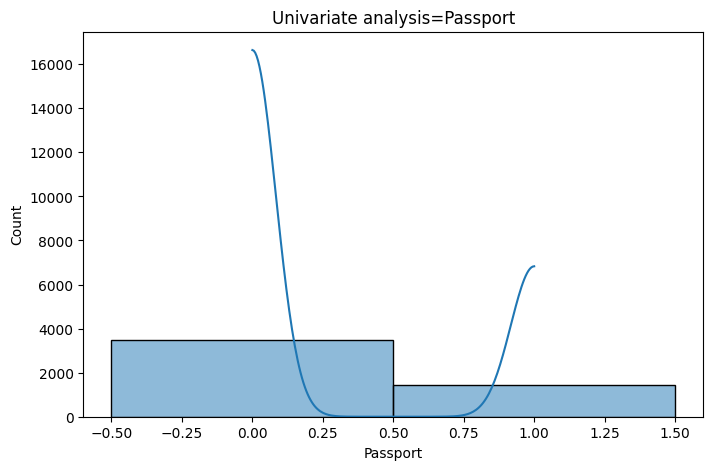

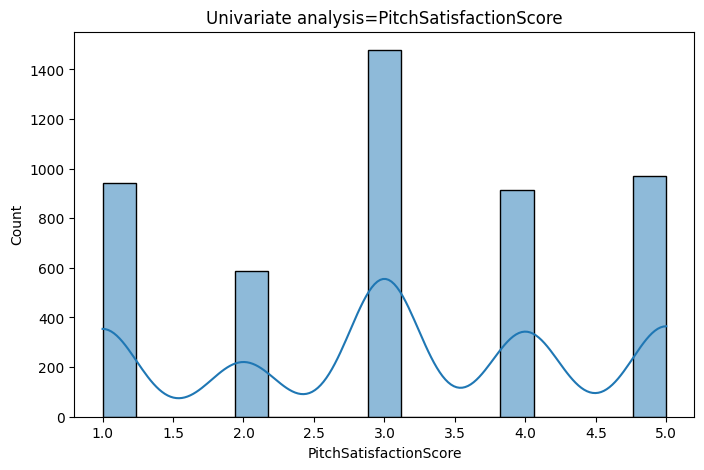

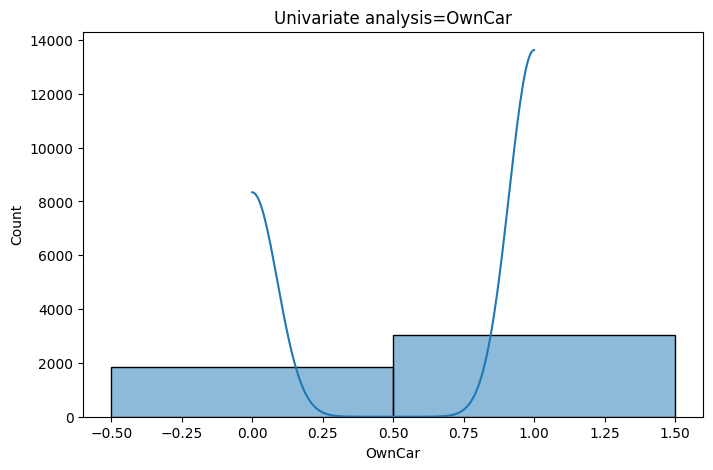

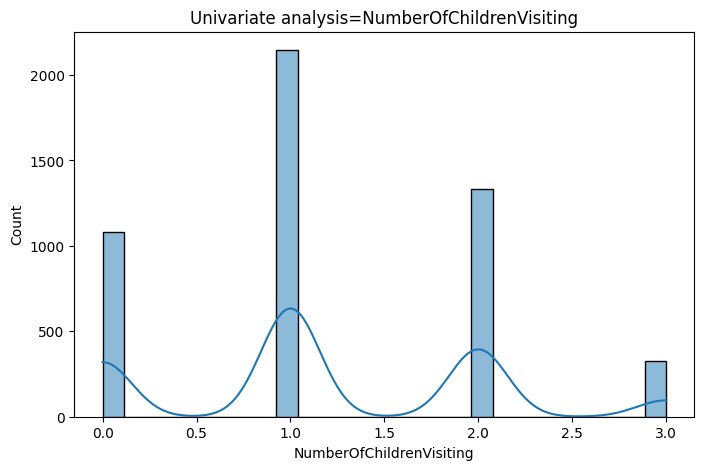

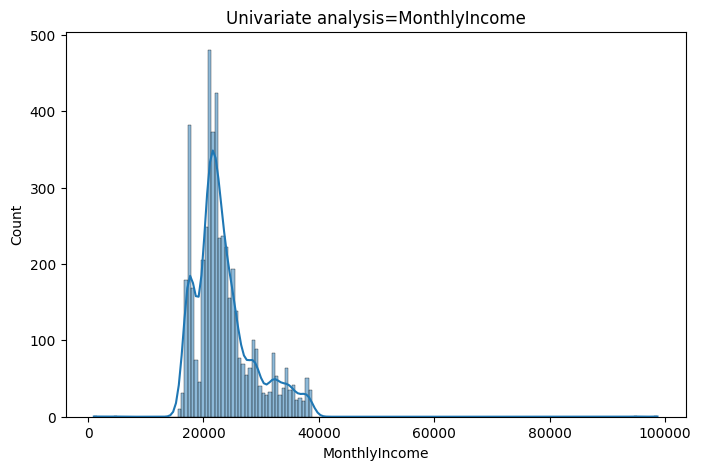

In [30]:
for nums_column in nums:
    plt.figure(figsize=(8,5))
    sns.histplot(data[nums_column],kde=True,palette='viridis')
    plt.title(f'Univariate analysis={nums_column}')
    plt.show()

(array([ 46.,  38.,  87.,  46., 130., 106., 285., 178., 199., 400., 189.,
        448., 457., 361., 150., 146., 297., 130., 221., 121., 153.,  65.,
         86., 158.,  66., 125.,  58.,  60.,  44.,  38.]),
 array([18.        , 19.43333333, 20.86666667, 22.3       , 23.73333333,
        25.16666667, 26.6       , 28.03333333, 29.46666667, 30.9       ,
        32.33333333, 33.76666667, 35.2       , 36.63333333, 38.06666667,
        39.5       , 40.93333333, 42.36666667, 43.8       , 45.23333333,
        46.66666667, 48.1       , 49.53333333, 50.96666667, 52.4       ,
        53.83333333, 55.26666667, 56.7       , 58.13333333, 59.56666667,
        61.        ]),
 <BarContainer object of 30 artists>)

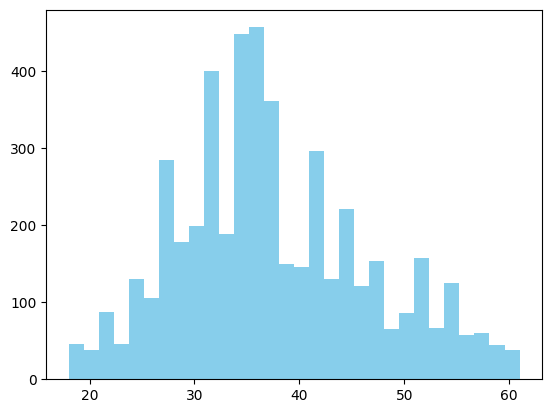

In [31]:
plt.hist(data['Age'].dropna(),bins=30,color='skyblue')

# Insights
People in age grp of 30-40 are travelling maximum

<Axes: xlabel='TypeofContact', ylabel='count'>

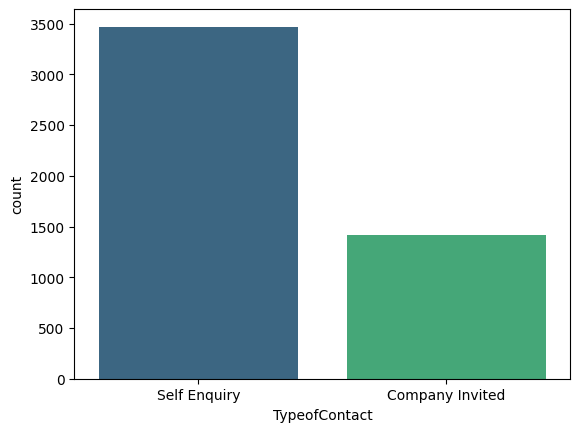

In [32]:
sns.countplot(x='TypeofContact',data=data,palette='viridis')

# Bivariate Analysis

<Axes: xlabel='MaritalStatus'>

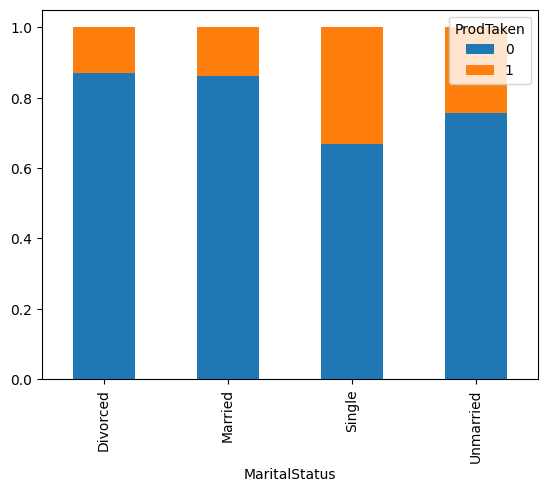

In [33]:
cross_tab=pd.crosstab(data['MaritalStatus'],data['ProdTaken'],normalize='index')
cross_tab.plot(kind='bar',stacked=True)

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

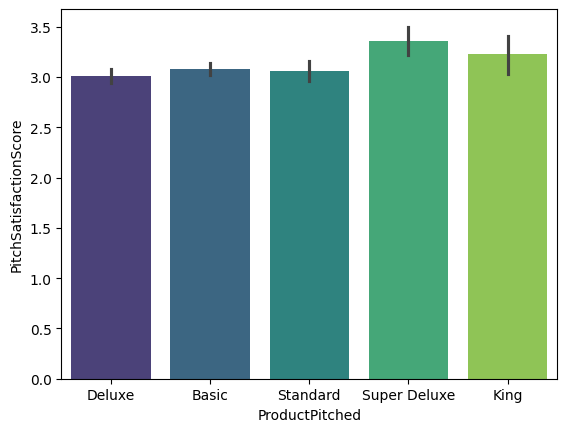

In [34]:
sns.barplot(x='ProductPitched',y='PitchSatisfactionScore',data=data,palette='viridis')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

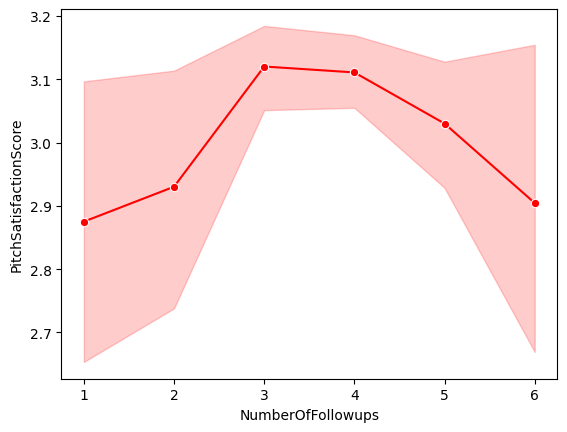

In [35]:
sns.lineplot(x='NumberOfFollowups',y='PitchSatisfactionScore',data=data,marker='o',color='r')

# Multivariate Analysis

<Axes: xlabel='ProdTaken', ylabel='Age'>

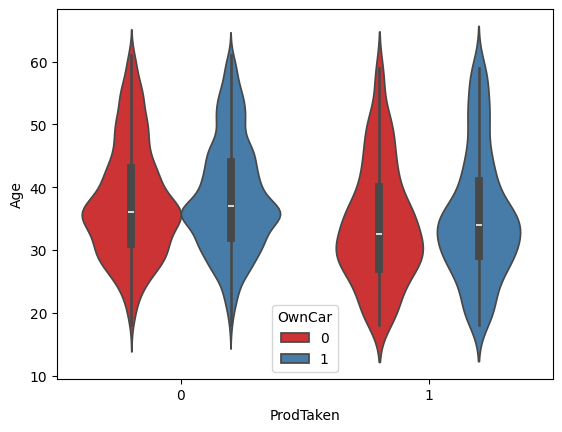

In [36]:
#Multivariate Analysis
sns.violinplot(x='ProdTaken',y='Age',data=data,hue='OwnCar',palette='Set1')

<Axes: xlabel='Gender', ylabel='Age'>

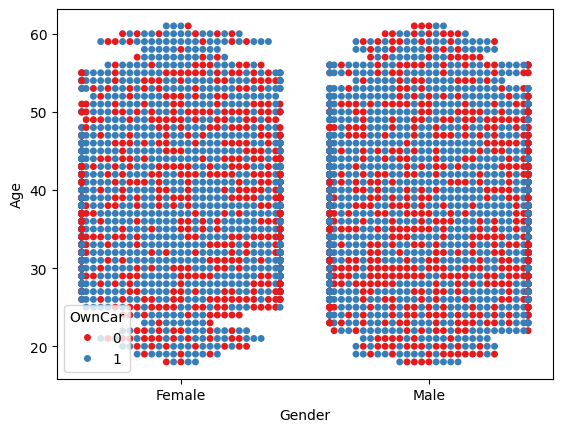

In [37]:
sns.swarmplot(x='Gender',y='Age',data=data,hue='OwnCar',palette='Set1')

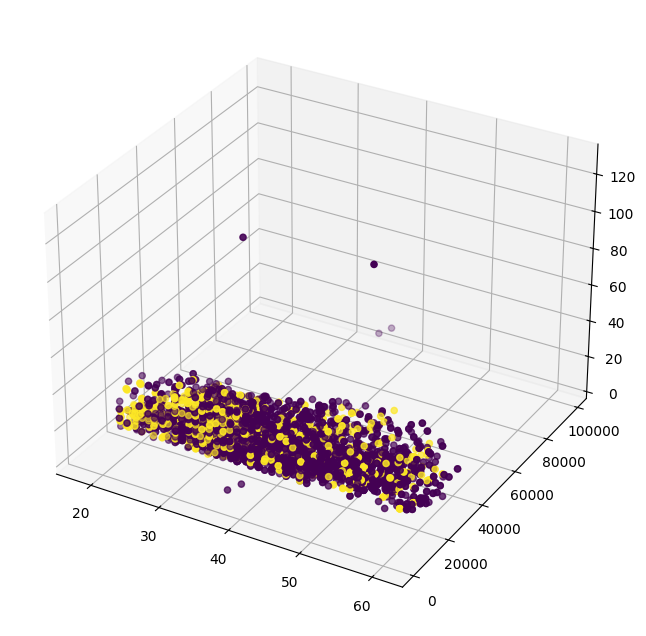

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['Age'],data['MonthlyIncome'],data['DurationOfPitch'],c=data['ProdTaken'],cmap='viridis')

# Create the Dashboard

In [39]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

# Sample figure: Age vs Monthly Income
fig = px.scatter(data, x="Age", y="MonthlyIncome", color="ProdTaken",
                 title="Age vs Monthly Income with Product Taken Indicator")

app.layout = html.Div([
    html.H1("Travel Data Dashboard"),
    dcc.Graph(id='age-income-scatter', figure=fig),
    dcc.Dropdown(
        id='gender-filter',
        options=[{'label': g, 'value': g} for g in data['Gender'].unique()],
        value=None,
        placeholder="Filter by Gender"
    )
])

@app.callback(
    Output('age-income-scatter', 'figure'),
    [Input('gender-filter', 'value')]
)
def update_chart(gender):
    filtered_data = data if not gender else data[data['Gender'] == gender]
    fig = px.scatter(filtered_data, x="Age", y="MonthlyIncome", color="ProdTaken",
                     title="Age vs Monthly Income with Product Taken Indicator")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
